In [91]:
import matplotlib.pyplot as yplt
import matplotlib as plt
import numpy as np
import csv
import re

# TD02 - CSV

Ce TD a été réalisé sur python en utilisant Jupyter Notebook. J'ai pensé que la  version numérique serait la plus adaptée puisque les codes et les graphiques ont été réalisés numériquement eux-aussi.

### Exercice 3 - Arbre à 3 volants d'inertie en série

In [92]:
# Définition des constantes
J = 15.32e-4 #kg.m2
Kt = 7.93e6 #N.m/rad
Me = 5 #N.m
Nddl = 3

# Définition des matrices
M = np.zeros([Nddl, Nddl])
K = np.zeros([Nddl, Nddl])
F = np.zeros(Nddl)

#Remplissage des matrices
  # Pour M
for i in range (0,Nddl):
    M[i][i] = J

  # Pour K
for i in range (1, Nddl-1):
    K[i,i]=2*Kt
    K[i,i-1]=-Kt
    K[i,i+1]=-Kt

K[0,0]=2*Kt
K[0,1]=-Kt
K[-1,-2]=-Kt
K[-1,-1]=2*Kt

  # Pour M
F[1]=Me

print("M : \n", M)
print("K : \n", K)
print("F : \n", F)

M : 
 [[0.001532 0.       0.      ]
 [0.       0.001532 0.      ]
 [0.       0.       0.001532]]
K : 
 [[15860000. -7930000.        0.]
 [-7930000. 15860000. -7930000.]
 [       0. -7930000. 15860000.]]
F : 
 [0. 5. 0.]


In [93]:

with open('Matrices\K.csv', encoding='utf-8-sig') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
    #Convertir en matrice (liste de listes)
    matrice = [ligne[:18] for ligne in list(lecteur_csv)[:18]]
    matrice_float = [[float(cellule) for cellule in ligne] for ligne in matrice]

# Afficher la matrice
print(matrice_float)

[[89380.0, -89380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-89380.0, 96880.0, -7500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -7500.0, 10000000000.0, -10000000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -10000000000.0, 10000000000.0, -3872000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, -3872000.0, 6343000.0, -2471000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, -2471000.0, 4942000.0, -2471000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, -2471000.0, 4942000.0, -2471000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2471000.0, 4942000.0, -2471000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2471000.0, 4942000.0, -2471000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\aymer\AppData\Local\Temp\ipykernel_19312\1379683664.py:1: SyntaxWarning: invalid escape sequence '\K'
  with open('Matrices\K.csv', encoding='utf-8-sig') as fichier_csv:


In [94]:
"""On cherche les pulsations propres
    --> On passe en complexe, sans amortissement ni frottements visqueux
        --> w2 = M^(-1)*K
    --> Il y a autant de mode propre que de ddl
"""

def modePropre(M,K):
    #print("M-1*K :\n", np.linalg.inv(M),"\n", K)
    lmd = np.dot(np.linalg.inv(M),K)
    #print("lamda :\n", lmd)

    valPropre, vecPropre = np.linalg.eig(lmd)


    # Obtenir les indices qui trient les valeurs propres par ordre croissant
    indices_tri = np.argsort(valPropre)
    print(indices_tri)

    # Trier les valeurs propres
    valeurs_propres_triees = valPropre[indices_tri]

    # Trier les vecteurs propres en fonction des indices triés
    vecteurs_propres_triees = vecPropre[:, indices_tri]

    return(valeurs_propres_triees, vecteurs_propres_triees)

In [95]:
A = modePropre(M, K)
print("Valeurs propres :\n", A[0])
print("\nVecteurs propres :\n", A[1])


[2 1 0]
Valeurs propres :
 [3.03217131e+09 1.03524804e+10 1.76727895e+10]

Vecteurs propres :
 [[ 5.00000000e-01 -7.07106781e-01 -5.00000000e-01]
 [ 7.07106781e-01  1.97958121e-16  7.07106781e-01]
 [ 5.00000000e-01  7.07106781e-01 -5.00000000e-01]]


[2 1 0]


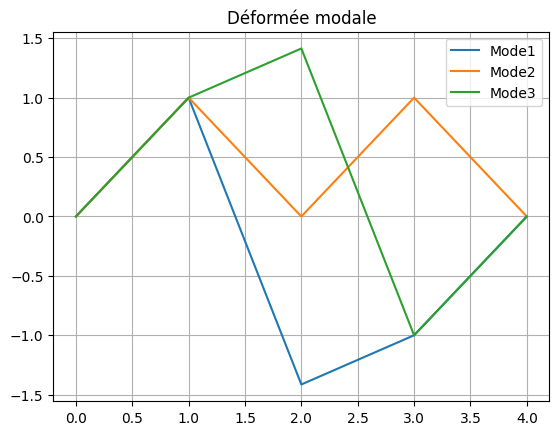

In [96]:
# Tracage des déformations modales :

def DeformeeModale(M, K):
    x = np.linspace(0, Nddl+1,Nddl+2) #Liste des abscisses
    #print(x)

    A = modePropre(M, K)
    valp = A[0]
    vecp = A[1]

    y = np.zeros([Nddl, len(x)])
    #print(vecp)
    for i, ln in enumerate(vecp):
        #print(ln, " -", len(y[i][1:-1]))
        y[i][1:-1] = ln/ln[0]

    #print(y)

    for i, ln in enumerate(y):
        yplt.plot(x, ln, label="Mode" + str(i+1))
    yplt.title("Déformée modale")
    yplt.grid()
    yplt.legend()

DeformeeModale(M,K)

In [97]:
"""On cherche maintenant la reponse en fréquence
    --> X=A-1F"""

def repFrequence(M, K, F, fmin, fmax):
    convPulsFreq = 1/(2*3.14)
    convRadDeg = 180/3.14

    w = np.linspace(fmin/convPulsFreq, fmax/convPulsFreq, 2000)
    
    Teta = np.zeros([Nddl, len(w)])

    for i, x in enumerate(w):
        A = K - (x**2)*M
        #print("\n", A, "\n")

        B = np.linalg.inv(A)

        X = np.dot(B,F)
        #print("\nX :\n", X)
        for j,Y in enumerate(X):
            Teta[j][i] = np.abs(Y*convRadDeg)
    
    return(w*convPulsFreq, Teta)

[0.0000000e+00 2.0010005e+01 4.0020010e+01 ... 3.9959980e+04 3.9979990e+04
 4.0000000e+04]



[[1.80721440e-05 1.80722543e-05 1.80725851e-05 ... 3.56621810e-07
  3.55751487e-07 3.54883933e-07]
 [3.61442880e-05 3.61444534e-05 3.61449496e-05 ... 3.62549302e-06
  3.62098087e-06 3.61647789e-06]
 [1.80721440e-05 1.80722543e-05 1.80725851e-05 ... 3.56621810e-07
  3.55751487e-07 3.54883933e-07]]



Objet1 -- Xmax =0.02419deg en f=8764Hz
Objet2 -- Xmax =0.03422deg en f=8764Hz
Objet3 -- Xmax =0.02419deg en f=8764Hz


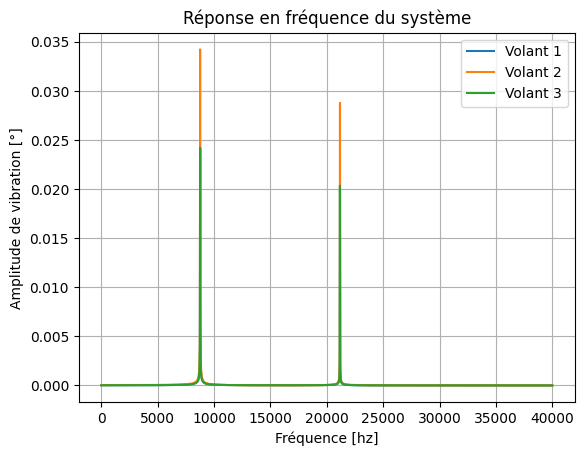

In [98]:
data = repFrequence(M, K, F, 0, 40000)
print(data[0])
print("\n\n")
print(data[1])

for i, ln in enumerate(data[1]):
    yplt.plot(data[0], ln, label="Volant "+str(i+1))
yplt.title("Réponse en fréquence du système")
yplt.grid()
yplt.xlabel("Fréquence [hz]")
yplt.ylabel("Amplitude de vibration [°]")
yplt.legend()

#" - max def = " + max(ln)) + " en f="+ str(np.where(ln == max(ln)[0][0])*convPulsFreq)

print("\n\n")
for i, ln in enumerate(data[1]):
    txt = "Objet" + str(i+1) + " -- Xmax ="
    txt += str(round(max(ln),5)) + "deg en f="
    txt += str(round(data[0][np.where(ln == max(ln))[0][0]])) + "Hz"
    print(txt)

On constate sur ce graphique qu'il n'y a que 2 pics, autour de 8 500Hz et 21 000Hz, mais il ne fait pas apparître un pic à la deuxième fréquence propre situé autour des 16 000Hz. Je n'ai pas de réponse immédiate à la raison de ce problème.

### Exercice 4 - Vibration en torsion d'une ligne d'arbre avec réducteur

In [99]:
# Définition des constantes 
J = 7.62e-4 #kg.m2
Kt = 3.73e3 #N.m/rad
Me = 50 #N.m
r = 2 #-
Nddl = 3 #T1, T2, A4

# Définition des matrices
M = np.zeros([Nddl, Nddl])
K = np.zeros([Nddl, Nddl])
F = np.zeros(Nddl)

# Remplissage des matrices
  # Pour K

K=np.zeros([3,3])

K[0][0]=7460
K[0][1]=-3730
K[1][0]=-3730
K[1][1]=18650
K[1][2]=-14920
K[2][1]=-14920
K[2][2]=14920

print(K)

  # Pour M
M[0][0] = 0.000762
M[1][1] = 0.001524
M[2][2] = 0.003048

print(M)

  # Pour F
F[0]=Me

[[  7460.  -3730.      0.]
 [ -3730.  18650. -14920.]
 [     0. -14920.  14920.]]
[[0.000762 0.       0.      ]
 [0.       0.001524 0.      ]
 [0.       0.       0.003048]]


[2 1 0]
Valeurs propres :
 [  371489.69855067  8988890.5082621  17562191.97166494]

Vecteurs propres :
 [[ 0.33264227 -0.96896639 -0.50653302]
 [ 0.64003983 -0.15858458  0.80425904]
 [ 0.69260244  0.18961819 -0.31079206]]
[2 1 0]


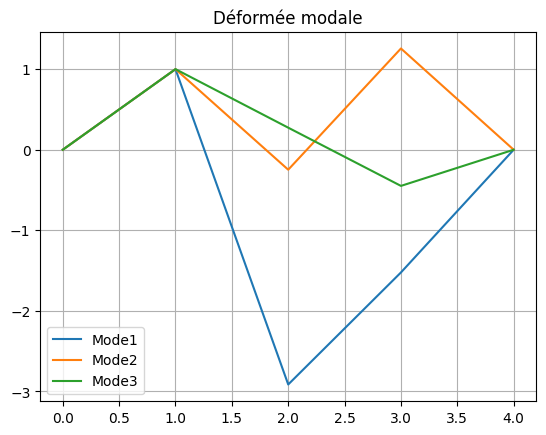

In [100]:
A = modePropre(M, K)
print("Valeurs propres :\n", A[0])
print("\nVecteurs propres :\n", A[1])

DeformeeModale(M, K)

[0.00000000e+00 5.00250125e-01 1.00050025e+00 ... 9.98999500e+02
 9.99499750e+02 1.00000000e+03]



[[0.7684295  0.76844035 0.76847289 ... 0.12924291 0.12906478 0.12888705]
 [0.7684295  0.76844964 0.76851007 ... 0.01229321 0.01225673 0.0122204 ]
 [0.7684295  0.76845119 0.76851627 ... 0.00174601 0.00173884 0.00173171]]



Objet1 -- Xmax =3443.08577deg en f=97Hz
Objet2 -- Xmax =6624.13214deg en f=97Hz
Objet3 -- Xmax =7168.06492deg en f=97Hz


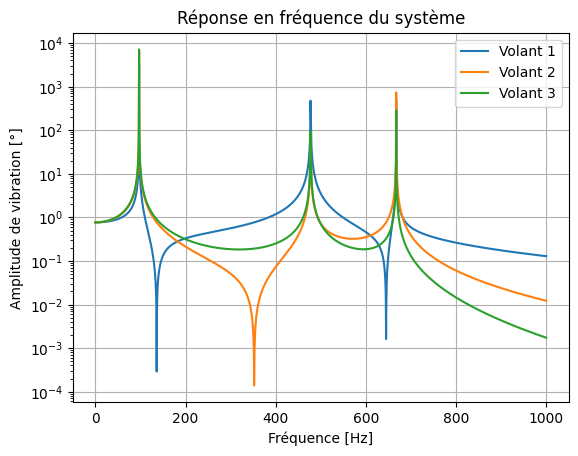

In [101]:
data = repFrequence(M, K, F, 0, 1000)
print(data[0])
print("\n\n")
print(data[1])

for i, ln in enumerate(data[1]):
    yplt.plot(data[0], ln, label="Volant "+str(i+1))
yplt.title("Réponse en fréquence du système")
yplt.grid()
yplt.xlabel("Fréquence [Hz]")
yplt.ylabel("Amplitude de vibration [°]")
yplt.legend()
yplt.yscale('log')

#" - max def = " + max(ln)) + " en f="+ str(np.where(ln == max(ln)[0][0])*convPulsFreq)

print("\n\n")
for i, ln in enumerate(data[1]):
    txt = "Objet" + str(i+1) + " -- Xmax ="
    txt += str(round(max(ln),5)) + "deg en f="
    txt += str(round(data[0][np.where(ln == max(ln))[0][0]])) + "Hz"
    print(txt)